# Transonic Airfoil Aerodynamic Coefficients Prediction using Artificial Neural Network

##Fill in your answer in "isi jawaban anda!"

In this notebook, an artificial neural network being modeled to predict the aerodynamic coefficients of an airfoil that flies at a nominal condition of __Mach Number M = 0.729__ where the data of varying M and __angle of attack α__ results in various __lift coefficient Cl__, __drag coefficient Cd__ and the pressure coefficient at the center of the upper surface of the airfoil __Cp__ using _Tensorflow and Keras_.

The data were taken from the following reference: Pramudita Satria Palar, Lavi Rizki Zuhal, and Koji Shimoyama."Gaussian Process Surrogate Model with Composite Kernel Learning for Engineering Design." _AIAA Journal_ 58, no. 4 (2020):1864-1880.

_Notebook made to explore simple Artificial Neural Network, Rafael S_

### Importing required packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import mean_squared_error

### Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/transonic_airfoil_data_set.csv').drop(columns = 'No')
df

,M,AoA,Cl,Cd,Cp
0,0.727928,2.449037,0.740129,0.013330,-0.911550
1,0.736393,2.389265,0.736667,0.015423,-1.218775
2,0.731969,2.251332,0.709717,0.013156,-1.122496
3,0.735015,2.388274,0.736197,0.014977,-1.214580
4,0.725872,2.448004,0.737060,0.012857,-0.697603
...,...,...,...,...,...
961,0.735045,2.165183,0.698091,0.013423,-1.164278
962,0.726631,2.204177,0.693080,0.011845,-0.626338
963,0.727602,2.113649,0.678026,0.011613,-0.634598
964,0.738150,2.251622,0.715140,0.014969,-1.198659


### Data Plot

Plotting the data to have a better visualization of our data distribution and linearity.

#### Lift Coefficient Cl Plot

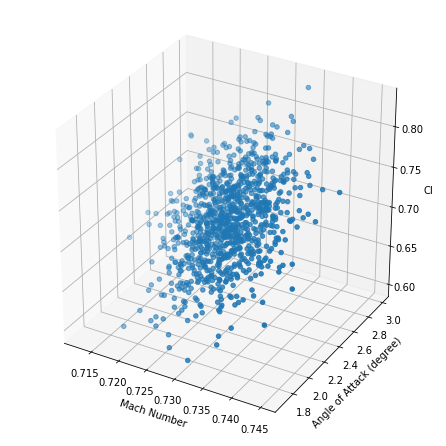

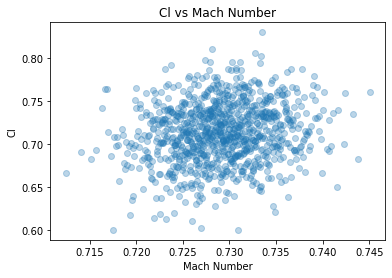

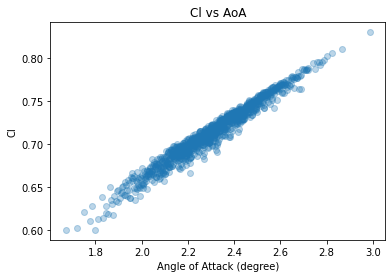

In [4]:
figcl = plt.figure(figsize = [6,6])
clplot = Axes3D(figcl)
clplot.scatter(df['M'], df['AoA'], df['Cl'])
clplot.set_xlabel('Mach Number')
clplot.set_ylabel('Angle of Attack (degree)')
clplot.set_zlabel('Cl')
plt.show()

plt.scatter(df['M'], df['Cl'], alpha = 0.3)
plt.xlabel('Mach Number')
plt.ylabel('Cl')
plt.title('Cl vs Mach Number')
plt.show()

plt.scatter(df['AoA'], df['Cl'], alpha = 0.3)
plt.xlabel('Angle of Attack (degree)')
plt.ylabel('Cl')
plt.title('Cl vs AoA')
plt.show()

#### Drag Coefficient Cd Plot

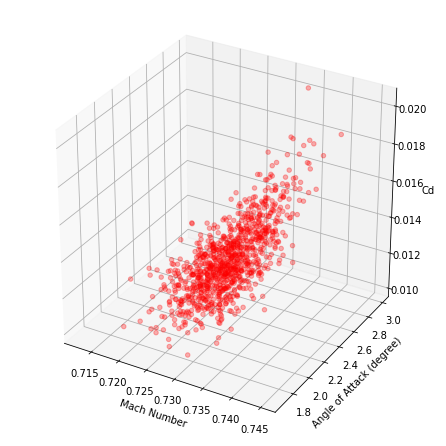

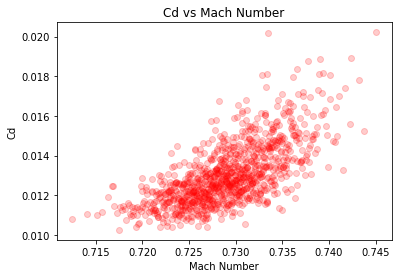

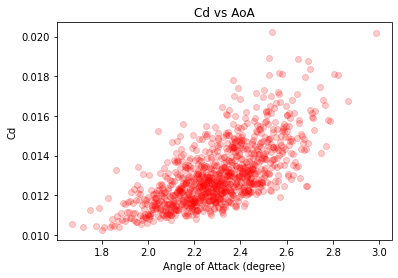

In [5]:
figcd = plt.figure(figsize = [6,6])
cdplot = Axes3D(figcd)
cdplot.scatter(df['M'], df['AoA'], df['Cd'], c = 'r', alpha = 0.3)
cdplot.set_xlabel('Mach Number')
cdplot.set_ylabel('Angle of Attack (degree)')
cdplot.set_zlabel('Cd')
plt.show()

plt.scatter(df['M'], df['Cd'], alpha = 0.2, c = 'r')
plt.xlabel('Mach Number')
plt.ylabel('Cd')
plt.title('Cd vs Mach Number')
plt.show()

plt.scatter(df['AoA'], df['Cd'], alpha = 0.2, c = 'r')
plt.xlabel('Angle of Attack (degree)')
plt.ylabel('Cd')
plt.title('Cd vs AoA')
plt.show()

#### Pressure Coefficient Cp Plot

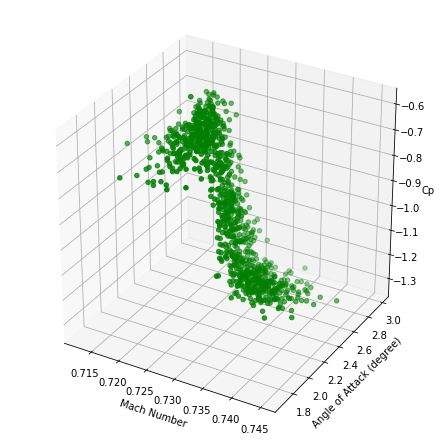

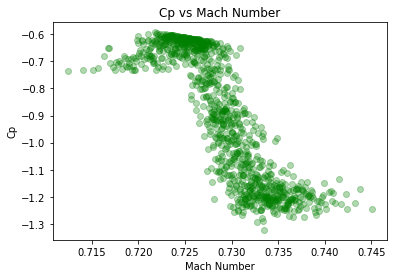

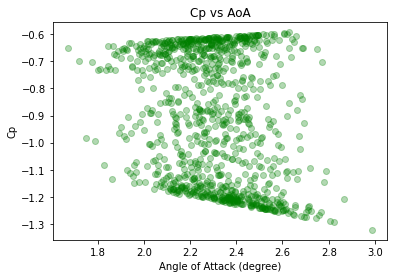

In [6]:
figcp = plt.figure(figsize = [6,6])
cpplot = Axes3D(figcp)
cpplot.scatter(df['M'], df['AoA'], df['Cp'], c = 'g')
cpplot.set_xlabel('Mach Number')
cpplot.set_ylabel('Angle of Attack (degree)')
cpplot.set_zlabel('Cp')
plt.show()

plt.scatter(df['M'], df['Cp'], alpha = 0.3, c = 'g')
plt.xlabel('Mach Number')
plt.ylabel('Cp')
plt.title('Cp vs Mach Number')
plt.show()

plt.scatter(df['AoA'], df['Cp'], alpha = 0.3, c = 'g')
plt.xlabel('Angle of Attack (degree)')
plt.ylabel('Cp')
plt.title('Cp vs AoA')
plt.show()

### Correlation Coefficient

Checking the Pearson's correlation coefficient to measure the statistical relationship, or association, between the variables.

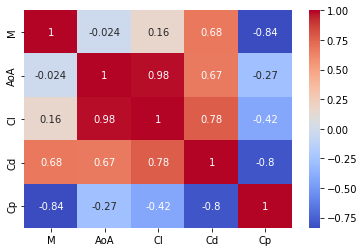

In [7]:
df_heatmap = sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

### Input and Output Data
Defining the input data and the output data.

In [8]:
X = df.loc[:, ['M', 'AoA']]
y = df.loc[:, ['Cl', 'Cd', 'Cp']]

In [9]:
X #Input Data

,M,AoA
0,0.727928,2.449037
1,0.736393,2.389265
2,0.731969,2.251332
3,0.735015,2.388274
4,0.725872,2.448004
...,...,...
961,0.735045,2.165183
962,0.726631,2.204177
963,0.727602,2.113649
964,0.738150,2.251622


In [10]:
y #Output Data

,Cl,Cd,Cp
0,0.740129,0.013330,-0.911550
1,0.736667,0.015423,-1.218775
2,0.709717,0.013156,-1.122496
3,0.736197,0.014977,-1.214580
4,0.737060,0.012857,-0.697603
...,...,...,...
961,0.698091,0.013423,-1.164278
962,0.693080,0.011845,-0.626338
963,0.678026,0.011613,-0.634598
964,0.715140,0.014969,-1.198659


### Dataset Split (Training and Validation Data)
Splitting the dataset by random and evenly distributed for the training and validation dataset.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 29)

Plotting to visualize the dataset split result.

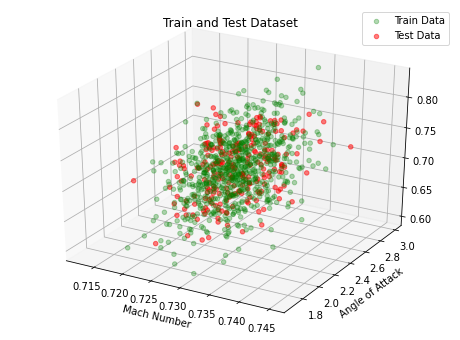

In [12]:
# Creating figure
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(X_train['M'], X_train['AoA'], y_train['Cl'], color = "green", alpha=0.3, label='Train Data')
visual_split.scatter3D(X_test['M'], X_test['AoA'], y_test['Cl'], color = "red",alpha=0.5, label='Test Data')
plt.title("Train and Test Dataset")
plt.xlabel('Mach Number')
plt.ylabel('Angle of Attack')
plt.legend()
plt.show()


## Normalizing The Data

Normalization ensures that the magnitude of the values that a feature assumes are more or less the same.

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scalery = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scalery.fit_transform(y_train)
y_test = scalery.transform(y_test)

## Modeling The Artificial Neural Network

The activation function for the hidden layer of the network is using the Rectified Linear Unit (ReLU) function as it is a simple, fast and observed to converge much more quickly and reliably.

The Dropout algorithm is commented out as it doesn't provide improvements after a few trainings, and early stopping method is being used instead to avoid overfitting our neural network to the dataset.

The optimizer is the adam optimizer as it provides an adaptive learning rate to optimize better.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
NNmodel = Sequential()

NNmodel.add(Dense(11,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(11,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(11,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))

NNmodel.add(Dense(units = 3,activation='linear')) #Output Layer

NNmodel.compile(loss='mse', optimizer='adam')

### Early Stopping

To avoid overfitting during the training of the neural network, early stopping method is being added. Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method.

In [17]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

### Training The Artificial Neural Network

In [18]:
NNmodel.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/1000
23/23 [==============================] - 1s 10ms/step - loss: 0.1452 - val_loss: 0.1070
Epoch 2/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0856 - val_loss: 0.0726
Epoch 3/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0650 - val_loss: 0.0604
Epoch 4/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0568 - val_loss: 0.0552
Epoch 5/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 0.0521
Epoch 6/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0510 - val_loss: 0.0500
Epoch 7/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0491 - val_loss: 0.0480
Epoch 8/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0472 - val_loss: 0.0461
Epoch 9/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0454 - val_loss: 0.0442
Epoch 10/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0438 - val_loss: 0.042

### Plotting The Losses During Training

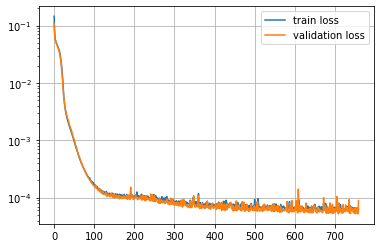

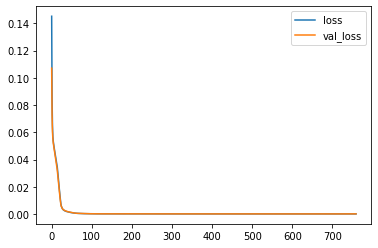

In [19]:
losses = pd.DataFrame(NNmodel.history.history)
plt.grid()
plt.yscale("log")
plt.plot(losses['loss'], label='train loss')
plt.plot(losses['val_loss'], label='validation loss')
plt.legend()
losses[['loss', 'val_loss']].plot()

### Predicting On The Test Dataset

In [20]:
predictions = NNmodel.predict(X_test)

In [21]:
predictions = scalery.inverse_transform(predictions)
y_test = scalery.inverse_transform(y_test)

### Mean Squared Error and Mean Absolute Error of the Prediction Results

In [22]:
mse_cl = mean_squared_error(y_test[:,0], predictions[:,0])
print(f"Mean Squared Error for Cl: {mse_cl}")
mae_cl = np.sum(np.absolute(y_test[:,0]- predictions[:,0]))/len(y_test)
print(f"Mean Absolute Error for Cl: {mae_cl}\n")
mse_cd = mean_squared_error(y_test[:,1], predictions[:,1])
print(f"Mean Squared Error for Cd: {mse_cd}")
mae_cd = np.sum(np.absolute(y_test[:,1]- predictions[:,1]))/len(y_test)
print(f"Mean Absolute Error for Cd: {mae_cd}\n")
mse_cp = mean_squared_error(y_test[:,2], predictions[:,2])
print(f"Mean Squared Error for Cp: {mse_cp}")
mae_cp = np.sum(np.absolute(y_test[:,2]- predictions[:,2]))/len(y_test)
print(f"Mean Absolute Error for Cp: {mae_cp}\n")

Mean Squared Error for Cl: 3.3496674981001533e-07
Mean Absolute Error for Cl: 0.0004566655663104098

Mean Squared Error for Cd: 7.777653280992967e-09
Mean Absolute Error for Cd: 5.674769463470161e-05

Mean Squared Error for Cp: 9.675257476479548e-05
Mean Absolute Error for Cp: 0.007714883738415302



### Predictions vs Ground Truth Plots

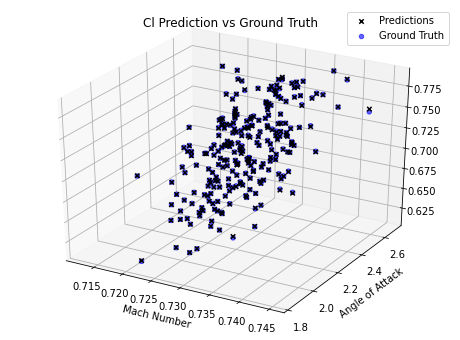

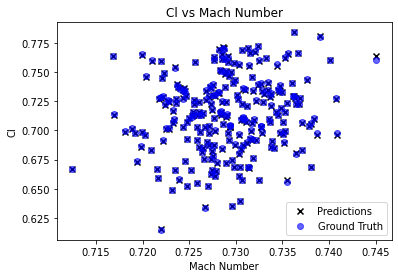

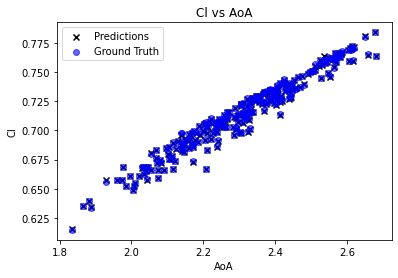

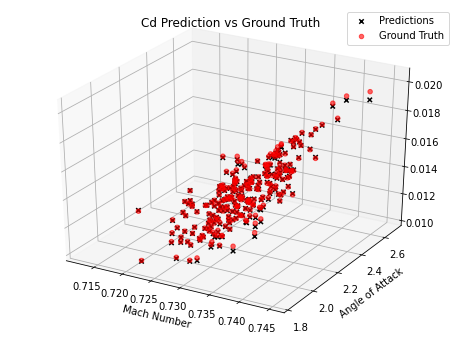

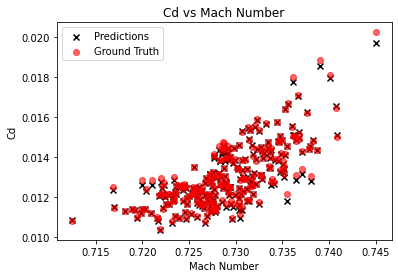

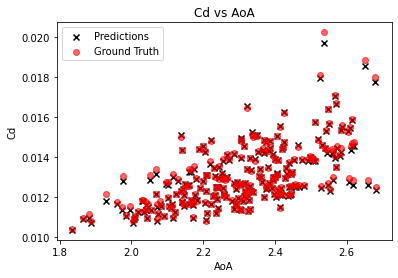

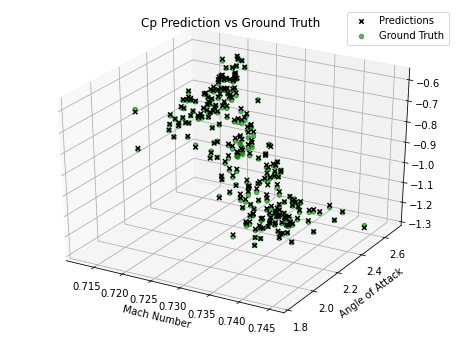

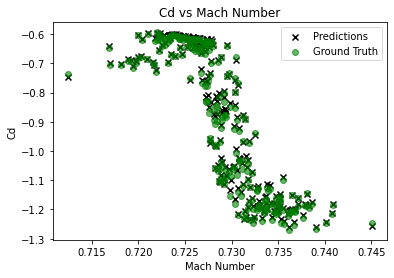

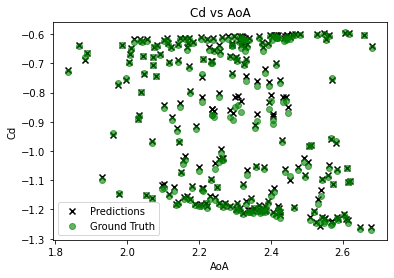

In [23]:
###############################Cl
# Creating figure Cl
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.title("Cl Prediction vs Ground Truth")
plt.xlabel('Mach Number')
plt.ylabel('Angle of Attack')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,0], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,0], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('Mach Number')
plt.ylabel('Cl')
plt.title('Cl vs Mach Number')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,1], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('AoA')
plt.ylabel('Cl')
plt.title('Cl vs AoA')
plt.legend()
plt.show()

##############################Cd
# Creating figure Cd
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], predictions[:,1], color = "black", alpha=1, label='Predictions', marker='x')
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], y_test[:,1], color = "red", alpha=0.6, label='Ground Truth')
plt.title("Cd Prediction vs Ground Truth")
plt.xlabel('Mach Number')
plt.ylabel('Angle of Attack')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,0], predictions[:,1], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,0], y_test[:,1], color = "red", alpha=0.6, label='Ground Truth')
plt.xlabel('Mach Number')
plt.ylabel('Cd')
plt.title('Cd vs Mach Number')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,1], predictions[:,1], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,1], y_test[:,1], color = "red", alpha=0.6, label='Ground Truth')
plt.xlabel('AoA')
plt.ylabel('Cd')
plt.title('Cd vs AoA')
plt.legend()
plt.show()

##############################Cp
# Creating figure Cp
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], predictions[:,2], color = "black", alpha=1, label='Predictions', marker='x')
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], y_test[:,2], color = "g", alpha=0.6, label='Ground Truth')
plt.title("Cp Prediction vs Ground Truth")
plt.xlabel('Mach Number')
plt.ylabel('Angle of Attack')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,0], predictions[:,2], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,0], y_test[:,2], color = "green", alpha=0.6, label='Ground Truth')
plt.xlabel('Mach Number')
plt.ylabel('Cd')
plt.title('Cd vs Mach Number')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,1], predictions[:,2], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,1], y_test[:,2], color = "green", alpha=0.6, label='Ground Truth')
plt.xlabel('AoA')
plt.ylabel('Cd')
plt.title('Cd vs AoA')
plt.legend()
plt.show()

### Sampling Predictions

In [24]:
sample_number = 6
#alldata=len(predictions)
print("[Cl Cd Cp]")
for i in range (sample_number):
    print(f"Sample Data {i+1}: {y_test[i]}")
    print(f"Prediction {i+1}: {predictions[i]}")
    error = np.abs(y_test[i]-predictions[i])
    print(f"error: {error}\n--------------------------------------------------")


[Cl Cd Cp]
Sample Data 1: [ 0.683542  0.011203 -0.686882]
Prediction 1: [ 0.6832161   0.01119963 -0.68453354]
error: [3.25905029e-04 3.37013441e-06 2.34846357e-03]
--------------------------------------------------
Sample Data 2: [ 0.73528   0.013844 -1.152869]
Prediction 2: [ 0.7343076   0.01389942 -1.1386915 ]
error: [9.72412853e-04 5.54166628e-05 1.41774555e-02]
--------------------------------------------------
Sample Data 3: [ 0.675539  0.01153  -0.624721]
Prediction 3: [ 0.6756004   0.01153187 -0.61894226]
error: [6.14095078e-05 1.86708689e-06 5.77873926e-03]
--------------------------------------------------
Sample Data 4: [ 0.652789  0.010931 -0.671232]
Prediction 4: [ 0.6526611   0.01088259 -0.66957444]
error: [1.27914871e-04 4.84063087e-05 1.65756047e-03]
--------------------------------------------------
Sample Data 5: [ 0.723796  0.014562 -1.201687]
Prediction 5: [ 0.7232706   0.01454189 -1.1957296 ]
error: [5.25404926e-04 2.01095278e-05 5.95738670e-03]
--------------------